In [15]:
import os
import glob
from functools import reduce

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [17]:
results_dir = "../../../../../../results/"
base_dir = "timeseries/time-varying/"
arrival_rate = "1_X_max"
run_type = "oracle-two-backends"
fluctuation_timeperiod = "500ms-fluctuation"
run_time = "5mins-run"
algos = ["wlc", 
         "feedback-wlc"]
runs = ["run"]

## Response rate

In [18]:
rr_percentiles = ['Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%',
                  'Response rate 80%', 'Response rate 90%', 'Response rate 95%', 'Response rate 98%',
                  'Response rate 99%', 'Response rate 100%'] 

In [19]:
rr_plot_data_dict = {}

for i in glob.glob(results_dir + base_dir + arrival_rate + "/" + run_type + "/" +  fluctuation_timeperiod + "/" + 
                   run_time + "/*/*/" + "response_rate.csv"):
    for algo in algos:
        if algo in i:
            for run in runs:
                if run in i:
                    rr_plot_data_dict[algo + ": " + run] = pd.read_csv(i, header=0, na_filter=False)

In [20]:
rr_plot_data = pd.DataFrame()
rr_plot_data['percentiles'] = rr_percentiles

rr_plot_percentile_dict = {}
for i in rr_percentiles:
    for k in rr_plot_data_dict:
        if k in rr_plot_percentile_dict:
            rr_plot_percentile_dict[k].append(rr_plot_data_dict[k][i][0])
        else:
            rr_plot_percentile_dict[k] = []
            rr_plot_percentile_dict[k].append(rr_plot_data_dict[k][i][0])
            
for k in rr_plot_data_dict:
    rr_plot_data[k] = rr_plot_percentile_dict[k]

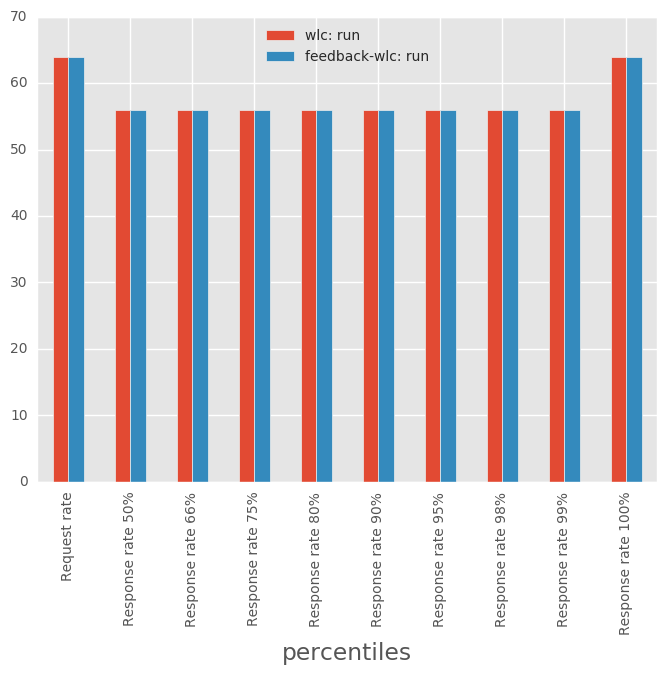

In [21]:
rr_plot_data.plot('percentiles', kind='bar')

## Response time

In [22]:
rt_percentiles = ['Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%',
                  'Response time 80%', 'Response time 90%', 'Response time 95%', 'Response time 98%',
                  'Response time 99%', 'Response time 100%']

In [23]:
rt_plot_data_dict = {}

for i in glob.glob(results_dir + base_dir + arrival_rate + "/" + run_type + "/" +  fluctuation_timeperiod + "/" + 
                   run_time + "/*/*/" + "response_time.csv"):
    for algo in algos:
        if algo in i:
            for run in runs:
                if run in i:
                    rt_plot_data_dict[algo + ": " + run] = pd.read_csv(i, header=0, na_filter=False)

In [24]:
rt_plot_data = pd.DataFrame()
rt_plot_data['percentiles'] = rt_percentiles

rt_plot_percentile_dict = {}
for i in rt_percentiles:
    for k in rt_plot_data_dict:
        if k in rt_plot_percentile_dict:
            rt_plot_percentile_dict[k].append(rt_plot_data_dict[k][i][0])
        else:
            rt_plot_percentile_dict[k] = []
            rt_plot_percentile_dict[k].append(rt_plot_data_dict[k][i][0])
            
for k in rt_plot_data_dict:
    rt_plot_data[k] = rt_plot_percentile_dict[k]

### Percentiles ...

500ms fluctuation, 0.5 alpha, 0.001 state feedback, 0.001 stat collection.

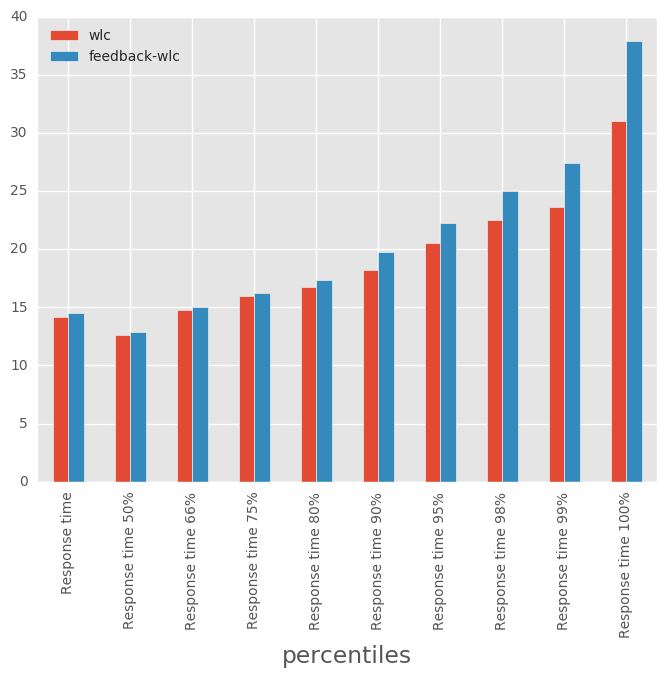

In [25]:
err_dict = {algo: pd.DataFrame() for algo in algos}
means = pd.DataFrame()
means['percentiles'] = rt_percentiles
errs = pd.DataFrame()
errs['percentiles'] = rt_percentiles

means = means.set_index('percentiles')
errs = errs.set_index('percentiles')

for i in range(len(rt_percentiles)):
    for algo in algos:
        err_list = []
        for run in runs:
            err_list.append(rt_plot_data[algo + ": " + run][i])
        err_dict[algo][rt_percentiles[i]] = err_list

for algo in algos:
    means[algo] = list(err_dict[algo].mean())
    errs[algo] = list(err_dict[algo].std())
        
means.plot(kind='bar', yerr=errs)

In [26]:
means.describe()

,wlc,feedback-wlc
count,10.000000,10.000000
mean,19.020000,20.823750
std,5.540304,7.632911
min,12.625000,12.875000
25%,15.062500,15.312500
50%,17.500000,18.562500
75%,22.000000,24.312500
max,31.000000,37.875000


### Below ... 

500ms fluctuation, 0.5 alpha, 0.001 state feedback, 0.001 stat collection.

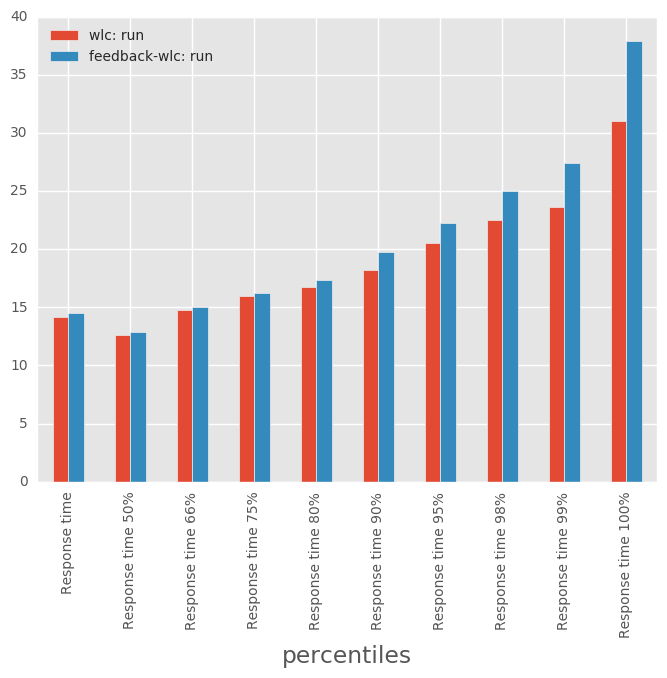

In [27]:
for run in runs:
    param_list = ['percentiles']
    for algo in algos:
        param_list.append(algo + ": " + run)
    rt_plot_data[param_list].plot('percentiles', kind='bar')

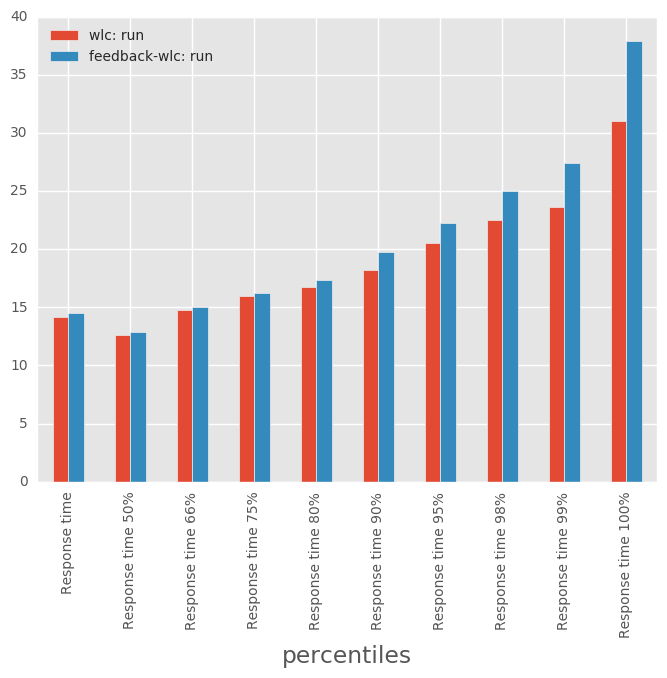

In [28]:
rt_plot_data.plot('percentiles', kind='bar')